In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
# from matminer.datasets import load_dataset
from pymatgen.core import Composition
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
stuff = sns.load_dataset('glue') #Load our dataset
stuff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    64 non-null     object 
 1   Year     64 non-null     int64  
 2   Encoder  64 non-null     object 
 3   Task     64 non-null     object 
 4   Score    64 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [7]:
stuff.head()

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1


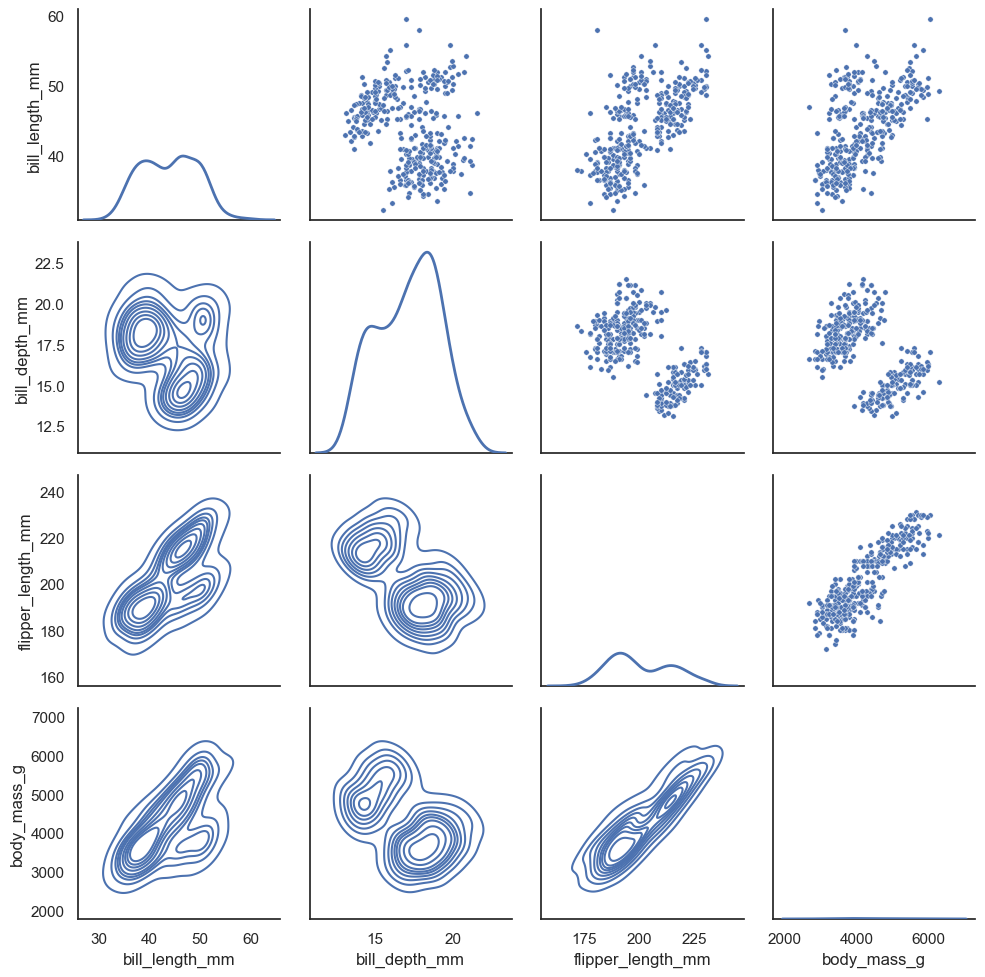

In [16]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.PairGrid(df, diag_sharey=True)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [44]:
test = pd.read_csv('./personality_dataset.csv')

In [45]:
display(test)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [53]:
test.loc[test['Stage_fear'] == "Yes", 'Stage_fear'] = 1
test.loc[test['Stage_fear'] == "No", 'Stage_fear'] = 0
test.loc[test['Drained_after_socializing'] == "Yes", 'Drained_after_socializing'] = 1
test.loc[test['Drained_after_socializing'] == "No", 'Drained_after_socializing'] = 0
test.loc[test['Personality'] == "Introvert", 'Personality'] = 1
test.loc[test['Personality'] == "Extrovert", 'Personality'] = 0
test['Stage_fear'] = test['Stage_fear'].astype(float)
test['Drained_after_socializing'] = test['Drained_after_socializing'].astype(float)
test['Personality'] = test['Personality'].astype(float)

In [54]:
display(test)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0.0
...,...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,0.0
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,0.0
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,1.0
2898,11.0,1.0,1.0,NaN,1.0,2.0,0.0,1.0


In [55]:
test["Personality"].value_counts()

Personality
0.0    1491
1.0    1409
Name: count, dtype: int64

In [56]:
filtered_test = test[(test['Drained_after_socializing'] == 0) & (test['Personality'] == 1)]

In [57]:
filtered_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 440 to 2865
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           78 non-null     float64
 1   Stage_fear                 79 non-null     float64
 2   Social_event_attendance    78 non-null     float64
 3   Going_outside              79 non-null     float64
 4   Drained_after_socializing  79 non-null     float64
 5   Friends_circle_size        79 non-null     float64
 6   Post_frequency             78 non-null     float64
 7   Personality                79 non-null     float64
dtypes: float64(8)
memory usage: 5.6 KB


In [58]:
filtered_test2 = test[(test['Drained_after_socializing'] == 1) & (test['Personality'] == 0)]

In [59]:
filtered_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 408 to 2852
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           110 non-null    float64
 1   Stage_fear                 111 non-null    float64
 2   Social_event_attendance    111 non-null    float64
 3   Going_outside              110 non-null    float64
 4   Drained_after_socializing  111 non-null    float64
 5   Friends_circle_size        111 non-null    float64
 6   Post_frequency             111 non-null    float64
 7   Personality                111 non-null    float64
dtypes: float64(8)
memory usage: 7.8 KB


In [60]:
filtered_test.describe()
# filtered_test.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,78.000000,79.0,78.000000,79.000000,79.0,79.000000,78.000000,79.0
mean,1.205128,0.0,7.012821,5.582278,0.0,11.240506,6.551282,1.0
std,0.944691,0.0,1.524634,1.045228,0.0,2.254427,1.640775,0.0
min,0.000000,0.0,4.000000,4.000000,0.0,6.000000,3.000000,1.0
25%,0.000000,0.0,6.000000,5.000000,0.0,9.000000,5.000000,1.0
50%,1.000000,0.0,7.000000,5.000000,0.0,11.000000,7.000000,1.0
75%,2.000000,0.0,8.000000,6.500000,0.0,13.000000,8.000000,1.0
max,3.000000,0.0,9.000000,7.000000,0.0,14.000000,9.000000,1.0


In [61]:
filtered_test2.describe()
# filtered_test2.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,110.000000,111.0,111.000000,110.000000,111.0,111.000000,111.000000,111.0
mean,8.427273,1.0,1.252252,0.963636,1.0,2.243243,1.009009,0.0
std,2.029413,0.0,0.957919,0.887500,0.0,1.308825,0.814589,0.0
min,4.000000,1.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0
25%,7.000000,1.0,0.000000,0.000000,1.0,1.000000,0.000000,0.0
50%,9.000000,1.0,1.000000,1.000000,1.0,2.000000,1.000000,0.0
75%,10.000000,1.0,2.000000,2.000000,1.0,3.000000,2.000000,0.0
max,11.000000,1.0,3.000000,2.000000,1.0,5.000000,2.000000,0.0


In [62]:
correlation_matrix = test.corr()
print(correlation_matrix)

                           Time_spent_Alone  Stage_fear  \
Time_spent_Alone                   1.000000    0.859387   
Stage_fear                         0.859387    1.000000   
Social_event_attendance           -0.733011   -0.860010   
Going_outside                     -0.750760   -0.882223   
Drained_after_socializing          0.860167    1.000000   
Friends_circle_size               -0.717185   -0.835318   
Post_frequency                    -0.732649   -0.854477   
Personality                        0.720312    0.865795   

                           Social_event_attendance  Going_outside  \
Time_spent_Alone                         -0.733011      -0.750760   
Stage_fear                               -0.860010      -0.882223   
Social_event_attendance                   1.000000       0.747756   
Going_outside                             0.747756       1.000000   
Drained_after_socializing                -0.859627      -0.882207   
Friends_circle_size                       0.734795    

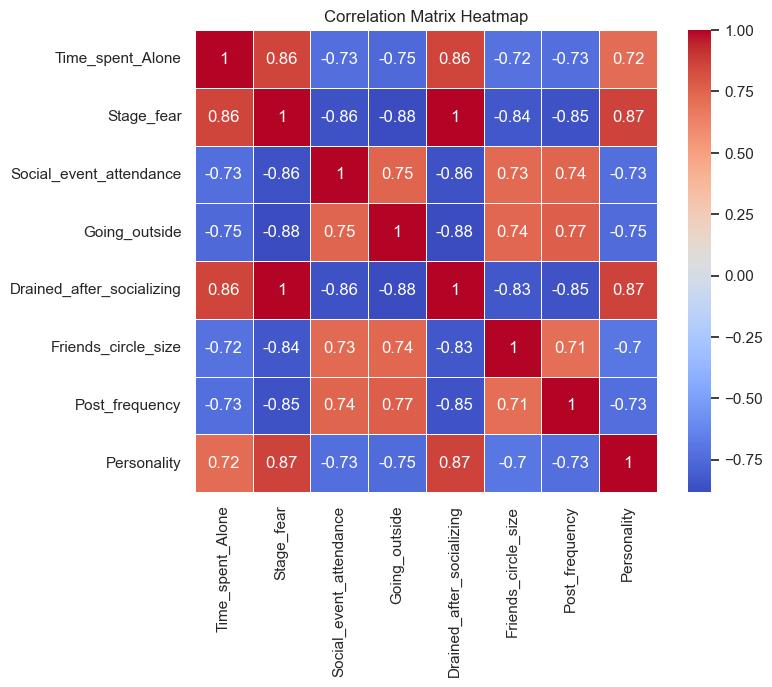

In [63]:
# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()